# Iris Dataset

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/iris_data.csv')
df.head()

,col1,col2,col3,col4,lbl
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Converting labels to number form
key={}
ctr=0
for i in set(list(df['lbl'])):
    key[i]=ctr
    ctr+=1
df['lbl'] = df['lbl'].apply(lambda x: key[x])

In [4]:
#Splitting dataset into training and testing
X = df[['col1','col2','col3','col4']]
Y = df[['lbl']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [5]:
gnb = GaussianNB()

In [6]:
y_pred = gnb.fit(x_train,y_train).predict(x_test)

/home/mihir/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
accuracy = ((np.array(y_test['lbl']) == y_pred).sum())*100/x_test.shape[0]
print("Accuracy of the model is: %d%% "%(accuracy))

Accuracy of the model is: 100% 


Text(91.68,0.5,'Predicted Labels')

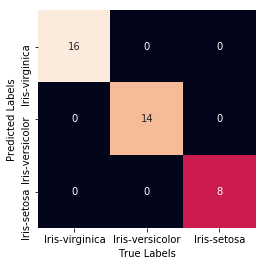

In [8]:
mat = confusion_matrix(np.array(y_test['lbl']),y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=key.keys(),yticklabels=key.keys())
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

In [9]:
fpr, tpr, thresholds = roc_curve(np.array(y_test['lbl']),y_pred,pos_label=2)

In [10]:
auc(fpr,tpr)

1.0